# Medical Appointment No Shows Dataset

### Why I choose this dataset?
- I was thinking of IMDB dataset but I've worked with it before, and I'm here to learn so I made a moderate choose not so hard not so easy either.

### Questions about the dataset?
- What are the correlations between features such as: (Age and No-show), (Diabetes and No-show), ....?
- How many of patients are alcoholic, had daiabetes or Hipertension or Scholarship or handcap?
- Does receving SMS message effect your attendance to the clinic?
- How many females and males reserved an appointment? Did they show up ?
- Did ending SMS to patients make an impact on showing up?

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Reading Data
df=pd.read_csv('patients.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


## Removing Hours from ScheduledDay & AppointmentDay columns.

In [3]:
#Delete last 10 chars in ScheduledDay & AppointmentDay cols and leave only day date.
df['ScheduledDay'] = df.apply(lambda x: x['ScheduledDay'][:-10], axis = 1)
df['AppointmentDay'] = df.apply(lambda x: x['AppointmentDay'][:-10], axis = 1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Replace No with 1, Yes with 0 in No-show column

In [4]:
df['No-show']=df['No-show'].map({'No':1, 'Yes':0})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


## No missing values  :)
### Shape of the Dataset:
 - We notice that we have 110527 rows and 14 features. 
 - Wow! No messing Data.

In [5]:
print(df.shape) #(110527 rows, 14 cols)
df.info()

(110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## What are the unique values?
- 104 unique ages ! (long live to the oldest)
- 81 Neighbourhood (What a big city)

In [7]:
#Number of unique values in each column (feature)
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Notice Age distribution ?! 
- Most of patients ages are less than or equal to 50 years old.

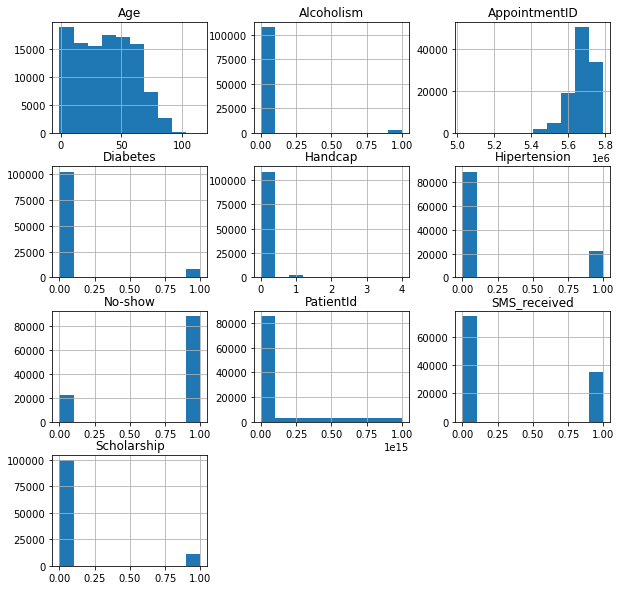

In [8]:
#plotting histogram for all data cols to see its distn.
df.hist(figsize=(10,10));

#### Proving my point more than half of patients are <= 50 yo.

In [9]:
print(sum(df['Age']<=50))

75104


### Correlations
- +ve correlation between Age and No-show but it's not strong enogh but it is the strongest correlation (0.06)
- -ve correlation between SMS_received and No-show (-0.126)

In [10]:
#Corr between cols.
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,0.001461
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,0.162602
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431
No-show,0.001461,0.162602,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000


### Hipertension
- 20% of patients have Hipertension regardless if they show up to their session or not.

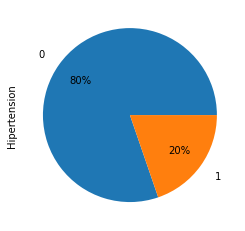

In [11]:
#Display no of patients with Hipertension.
df['Hipertension'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2);

### Diabetes
- 93% of patients don't have diabetes, only 7% of patients have diabetes.

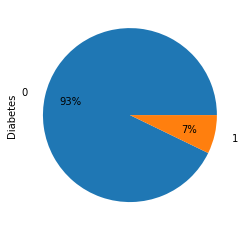

In [12]:
df['Diabetes'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2);

### Scholarship
- 10% of patients had scholarship.

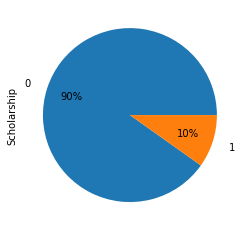

In [13]:
df['Scholarship'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2);

### Alcoholism
- only 3% of patients were alcoholic.

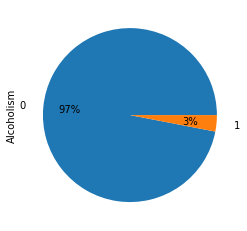

In [14]:
df['Alcoholism'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2);

### Handcap
- Only 2% of people had handcap.

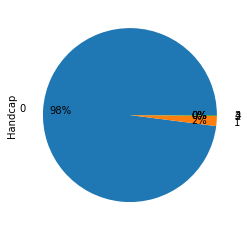

In [15]:
df['Handcap'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2);

# Gender and No-show
#### Plotting Number of Females and Males Patients
- We notice that Females are much likely to go to the clinic.
- 71840 Females and 38687 Males

In [16]:
df['No-show'].groupby(df['Gender']).size()

Gender
F    71840
M    38687
Name: No-show, dtype: int64

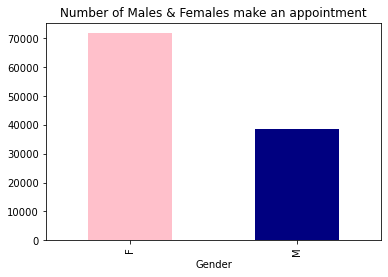

In [17]:
df.groupby(df['Gender']).size().plot(kind='bar',color=['pink','navy']);
plt.xlabel('Gender');
plt.title('Number of Males & Females make an appointment');

#### Since females number is more than double of males number
- Number of women attended to their appointment are more than 60k against 30k of males attended.
- Number of women who didn't attend are more than 14k, and only more than 7k of males didn't attend. 

In [18]:
df.groupby(['No-show','Gender']).size()

No-show  Gender
0        F         14594
         M          7725
1        F         57246
         M         30962
dtype: int64

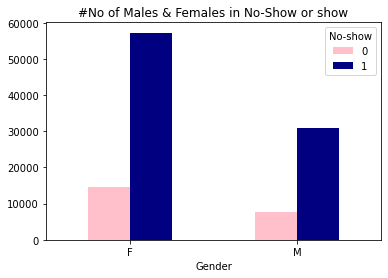

In [19]:
df.groupby(['No-show','Gender']).size().unstack(level=0).plot(kind='bar',rot=0, color=['Pink','Navy']);
plt.title('#No of Males & Females in No-Show or show')
plt.show()

#### Receiving SMS message didn't effect attendance to the clinic as number of patients who show up and received SMS are 9784

In [20]:
print(sum((df['SMS_received']==1)& (df['No-show']==0)))

9784


## Limitations
- There were no missing data.
- Replace No with 1, Yes with 0 in "No-show" column to calculate correlation between all features with it.
- I Deleted hours from "AppointmentDay" and "ScheduledDay" to make it easier to display it, but I didn't use it anyway.

## Conclusion 
- Age has the highest +ve correlation (0.06) with No-show, ofcourse I won't consider AppointmentID correlation value as it's just an id for the session and it has nothing to do with No-show. (insignificant conclusion since we are working with sample and made no tests) 
- Most of Patients are less than or equal to 50 years old. (In this sample)
- Women are more than men in reservation hence in showing up in the clinic. (In this sample)
- Sending SMS to patients didn't make a great impact on showing up. (In this sample)


## Resourses
- 1- Datacamp course (Intro to Python) 3rd or 4th lesson about plotting for stacked bars But I failed to apply it.
- 2- Stackoverflow 

In [ ]:
# I was trying to plot a stacked bar chart but it failed.
female_diabetes=sum((df['Gender']=='F') & (df['Diabetes']==1)) #5606
male_diabetes=sum((df['Gender']=='M') & (df['Diabetes']==1))   #2337
plt.bar(df['No-show'], female_diabetes, label='Female')
plt.bar(df['No-show'],male_diabetes ,label='Male')
plt.legend()
plt.show()

C:\Users\Hagar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
